In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df=pd.read_csv('credit_risk_dataset.csv')

In [57]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [59]:
df.describe()
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [61]:
df=df.dropna()

In [62]:
def extract_columns(df):

    # Selecting numerical columns
    numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
    
    # Selecting categorical columns
    categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

    return categorical_columns, numerical_columns

In [63]:
cat_col,num_col=extract_columns(df)

In [64]:
num_col

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [65]:
cat_col.append('loan_status')
num_col.remove('loan_status')

In [66]:
#unique values in categorical columns
for i in cat_col:
    print(i+':')
    print(df[i].unique())

person_home_ownership:
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent:
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade:
['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file:
['Y' 'N']
loan_status:
[1 0]


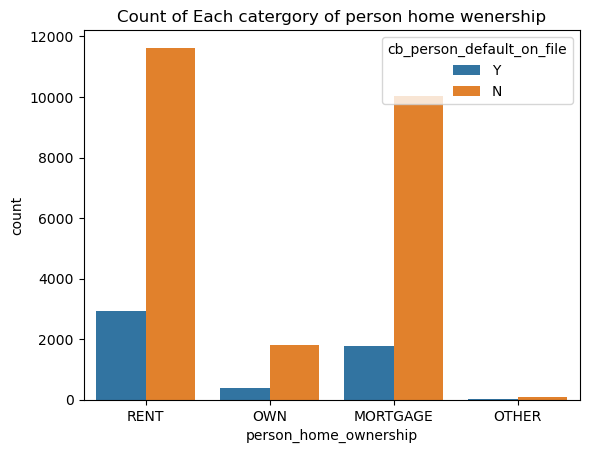

In [67]:
sns.countplot(data=df,x='person_home_ownership',hue='cb_person_default_on_file')
# plt.ylim(13000)
plt.title("Count of Each catergory of person home wenership")
plt.show()

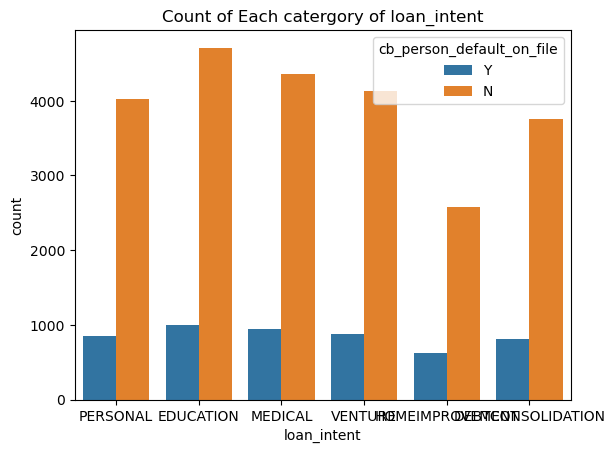

In [68]:
sns.countplot(data=df,x='loan_intent',hue='cb_person_default_on_file')
plt.title("Count of Each catergory of loan_intent")
plt.show()

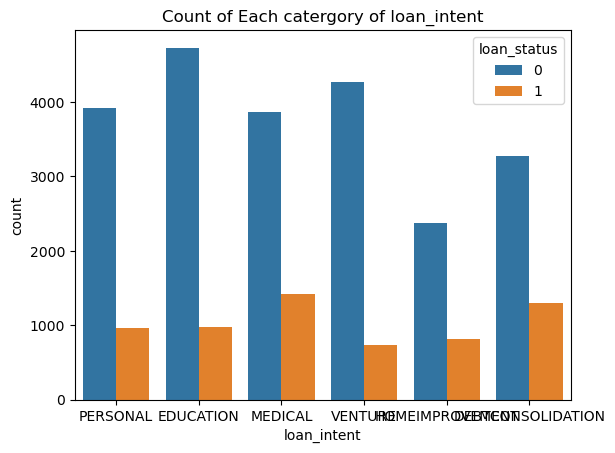

In [69]:
sns.countplot(data=df,x='loan_intent',hue='loan_status')
plt.title("Count of Each catergory of loan_intent")
plt.show()

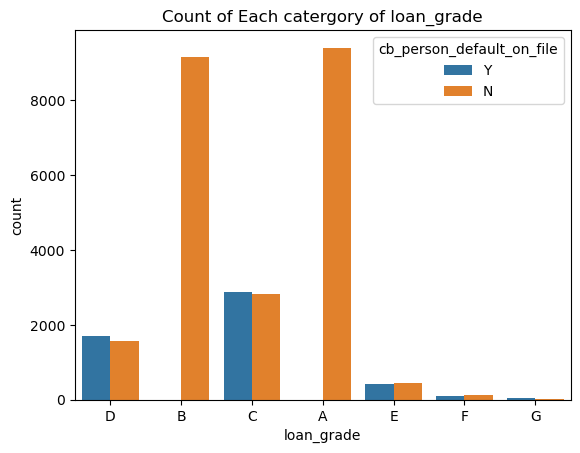

In [70]:

sns.countplot(x='loan_grade',hue='cb_person_default_on_file',data=df)
plt.title("Count of Each catergory of loan_grade")
plt.show()

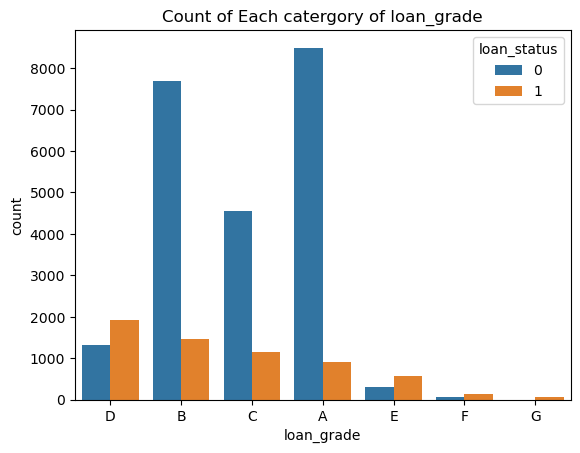

In [71]:

sns.countplot(x='loan_grade',hue='loan_status',data=df)
plt.title("Count of Each catergory of loan_grade")
plt.show()

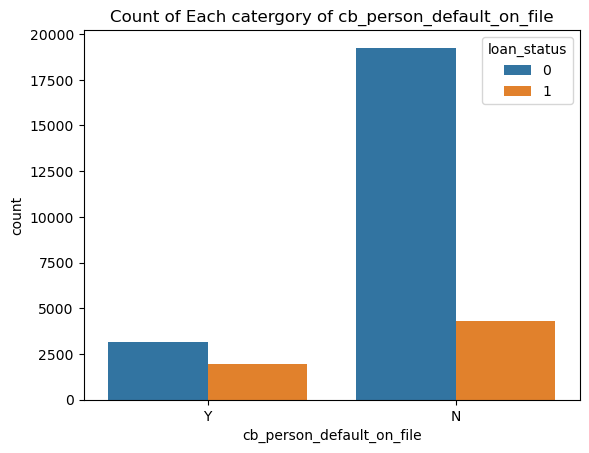

In [72]:
sns.countplot(data=df,x='cb_person_default_on_file',hue='loan_status')
plt.title("Count of Each catergory of cb_person_default_on_file")
plt.show()

C:\Users\Rohit Shere\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


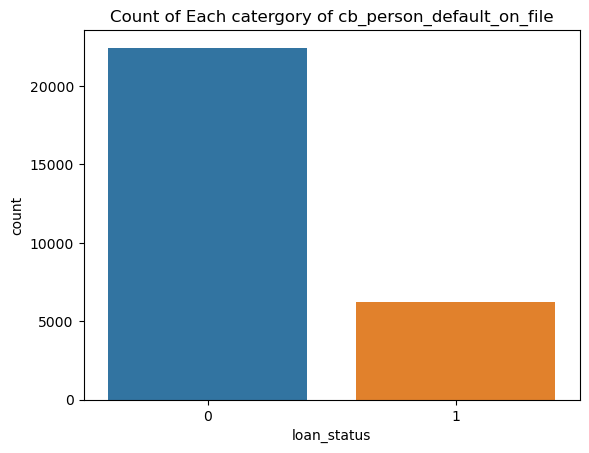

In [73]:
sns.countplot(df['loan_status'])
plt.title("Count of Each catergory of cb_person_default_on_file")
plt.show()

# Numerical data

Text(0.5, 1.0, 'default on Persons Age ')

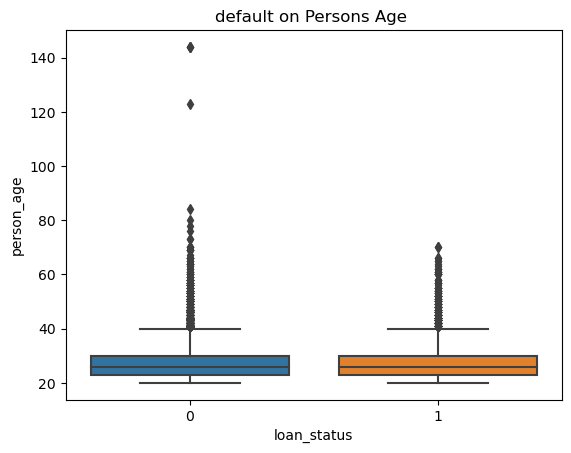

In [74]:
sns.boxplot(data=df,x='loan_status',y='person_age')
plt.title("default on Persons Age ")

Text(0.5, 1.0, 'loan_int_rate and person income')

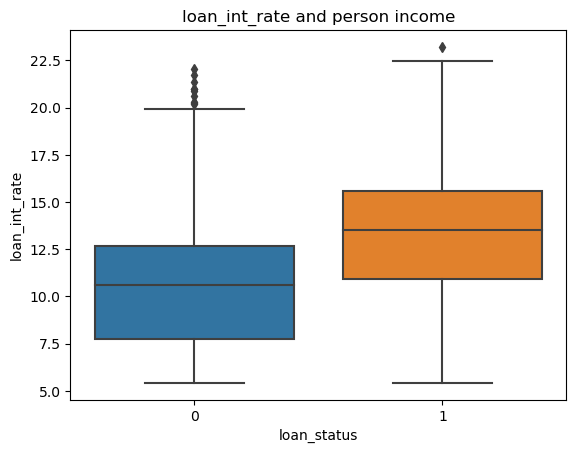

In [75]:
sns.boxplot(data=df,x='loan_status',y='loan_int_rate')
plt.title("loan_int_rate and person income")

Text(0.5, 1.0, 'loan_int_rate vs loan grade')

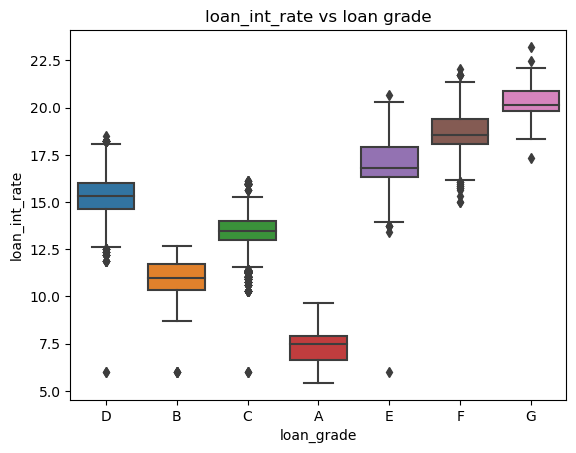

In [76]:
sns.boxplot(data=df,x='loan_grade',y='loan_int_rate')
plt.title("loan_int_rate vs loan grade")

Text(0.5, 1.0, 'loan_percent_income and person income')

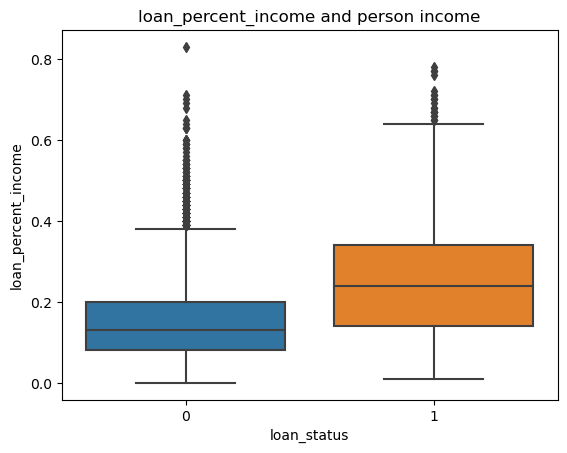

In [77]:
sns.boxplot(data=df,x='loan_status',y='loan_percent_income')
plt.title("loan_percent_income and person income")

Text(0.5, 1.0, 'loan_amnt and person income')

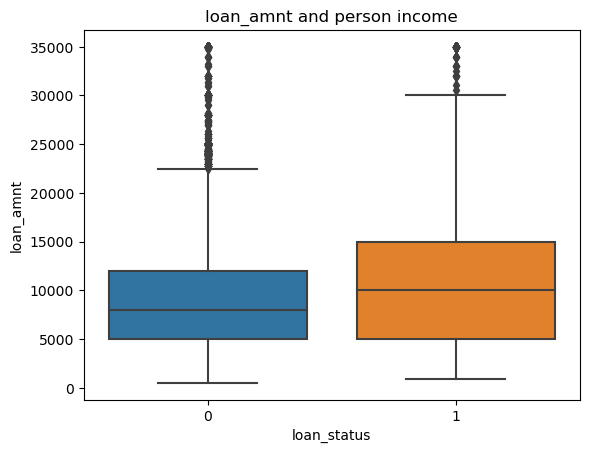

In [78]:
sns.boxplot(data=df,x='loan_status',y='loan_amnt')
plt.title("loan_amnt and person income")

Text(0.5, 1.0, 'person_emp_length and person income')

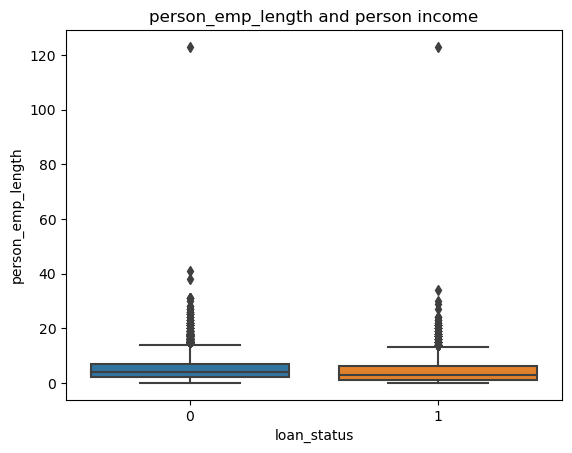

In [79]:
sns.boxplot(data=df,x='loan_status',y='person_emp_length')
plt.title("person_emp_length and person income")

Text(0.5, 1.0, 'person_emp_length and person income')

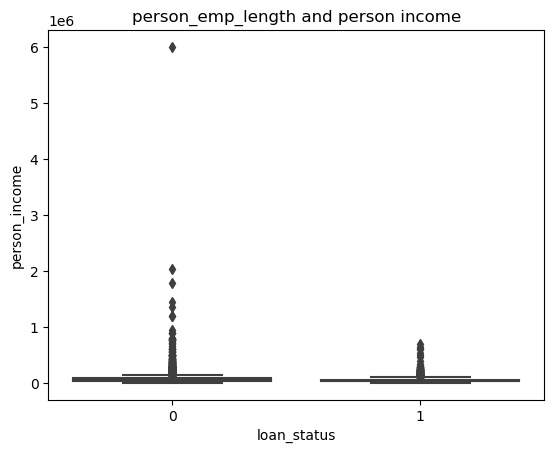

In [80]:
sns.boxplot(data=df,x='loan_status',y='person_income')
plt.title("person_emp_length and person income")

In [81]:
num_col

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

## Summary of EDA

- **There is significant difference in defaulting the loan. Grade A and B are very less likely to default where as others are high likely to default**
- **Not any significant dependency of loan default on the intent of loan**
- **High corelation in default with respect to the loan interes. loan given with high interest is more likely to default**
- **High loan amounts are more likely to be default**

- **There is slightly more chances of loan aproval with no default history**
- **Grade A and B loans are less aproved**
- **Loan amount and loan interest are positively correlated with loan aproval**
- **As grade increases the interest rate also increases**

array([[<AxesSubplot:title={'center':'person_age'}>,
        <AxesSubplot:title={'center':'person_income'}>,
        <AxesSubplot:title={'center':'person_emp_length'}>],
       [<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'loan_int_rate'}>,
        <AxesSubplot:title={'center':'loan_percent_income'}>],
       [<AxesSubplot:title={'center':'cb_person_cred_hist_length'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

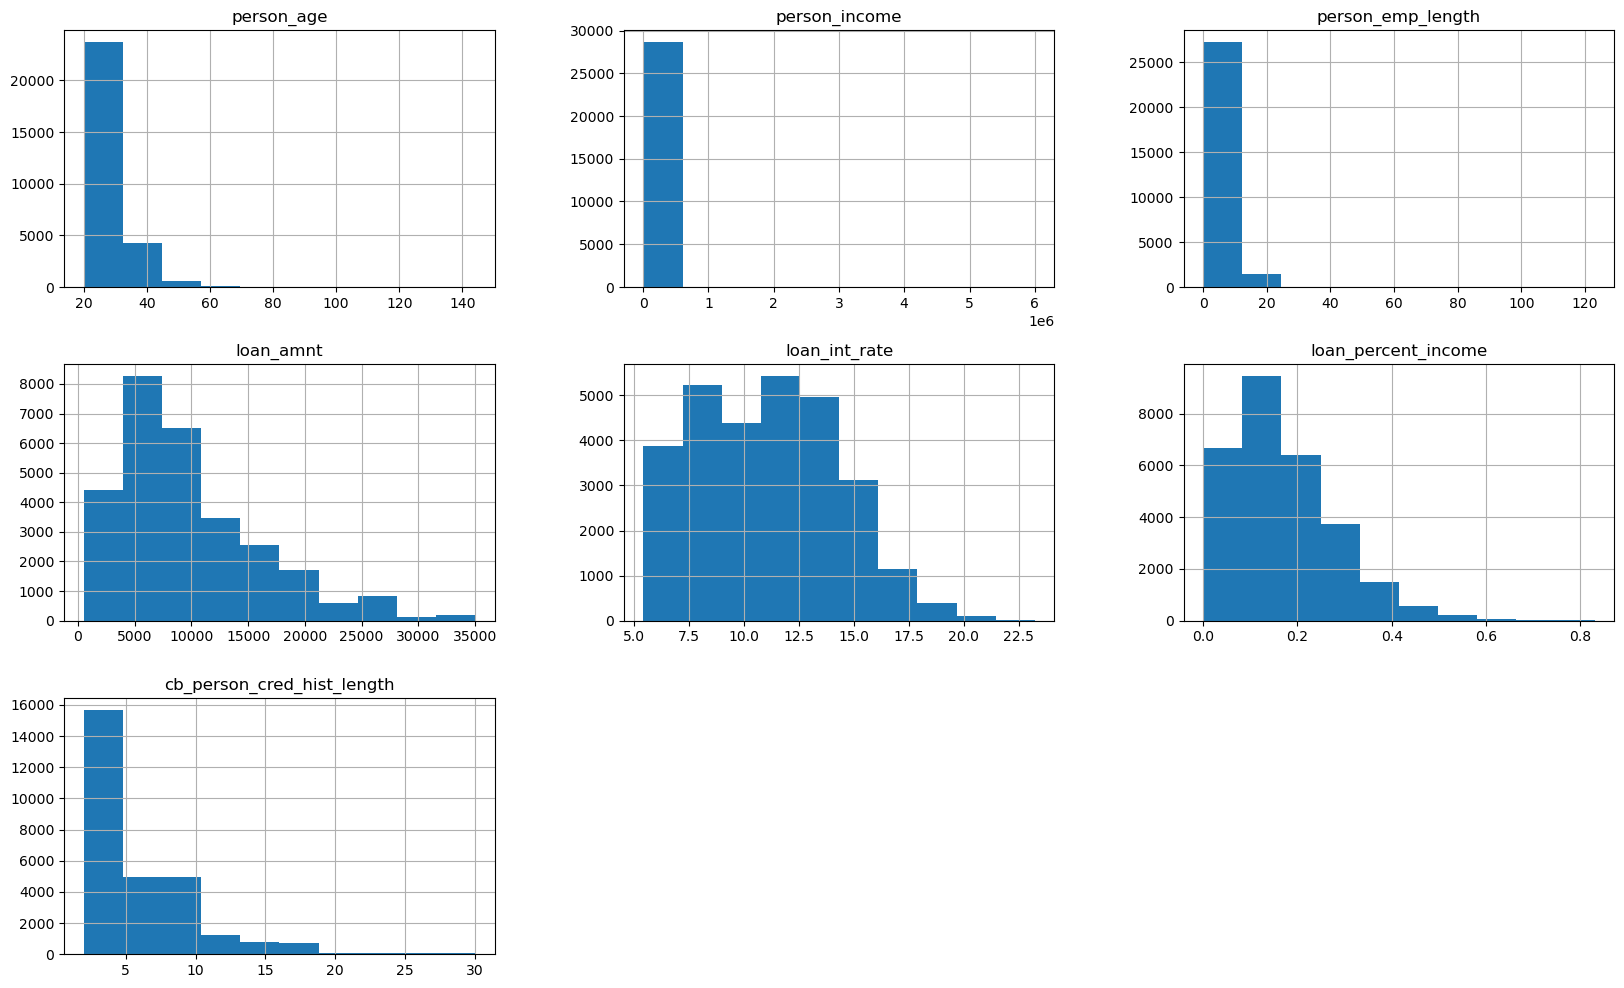

In [82]:
df[num_col].hist(figsize=(20,12))

In [83]:
new_df=pd.DataFrame()
for i in num_col:
    new_df[f'{i}_log']=np.log1p(df[i])
for i in cat_col:
    new_df[i]=df[i]
    

In [84]:
new_df['person_age']=df['person_age']
new_df.drop('person_age_log',axis=1,inplace=True)
new_df.head()


,person_income_log,person_emp_length_log,loan_amnt_log,loan_int_rate_log,loan_percent_income_log,cb_person_cred_hist_length_log,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,loan_status,person_age
0,10.985310,4.820282,10.463132,2.834389,0.463734,1.386294,RENT,PERSONAL,D,Y,1,22
1,9.169623,1.791759,6.908755,2.496506,0.095310,1.098612,OWN,EDUCATION,B,N,0,21
2,9.169623,0.693147,8.612685,2.629728,0.451076,1.386294,MORTGAGE,MEDICAL,C,N,1,25
3,11.089821,1.609438,10.463132,2.786861,0.425268,1.098612,RENT,MEDICAL,C,N,1,23
4,10.904138,2.197225,10.463132,2.725890,0.438255,1.609438,RENT,MEDICAL,C,Y,1,24


In [85]:
nor_num_col='person_age'
skewed_col=num_col
skewed_col.remove('person_age')



In [86]:
print(nor_num_col)
print(skewed_col)
print(cat_col)

person_age
['person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'loan_status']


In [87]:
cat_col.remove('loan_status')

In [88]:
num_col

['person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [89]:
#transformation 
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

df = pd.get_dummies(df, columns=['person_home_ownership'], drop_first=True)

df = pd.get_dummies(df, columns=['loan_intent'], drop_first=True)

grade_order = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df['loan_grade'] = df['loan_grade'].map(grade_order)


In [90]:
##trian test split
from sklearn.model_selection import train_test_split

X = df.drop('loan_status', axis=1)  # replace with actual target like 'person_default'
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

modelr=RandomForestClassifier(1000)
modelr.fit(X_train,y_train)

C:\Users\Rohit Shere\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(n_estimators=1000)

In [92]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve
)

def eval(X_test,model):
    # Predict
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # for AUC

    # Confusion Matrix
    print("📌 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Classification Report
    print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

    # ROC AUC Score
    print(f"🏅 ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")


In [93]:
X.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [43]:
print("Logistic Regression Model: ")
eval(X_test,model)

Logistic Regression Model: 
📌 Confusion Matrix:
 [[4307  180]
 [ 698  543]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      4487
           1       0.75      0.44      0.55      1241

    accuracy                           0.85      5728
   macro avg       0.81      0.70      0.73      5728
weighted avg       0.84      0.85      0.83      5728

🏅 ROC AUC Score: 0.8371


In [45]:
print("Random Forest Classifier Model : ")
eval(X_test,modelr)

Random Forest Classifier Model : 
📌 Confusion Matrix:
 [[4456   31]
 [ 367  874]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      4487
           1       0.97      0.70      0.81      1241

    accuracy                           0.93      5728
   macro avg       0.94      0.85      0.89      5728
weighted avg       0.93      0.93      0.93      5728

🏅 ROC AUC Score: 0.9312


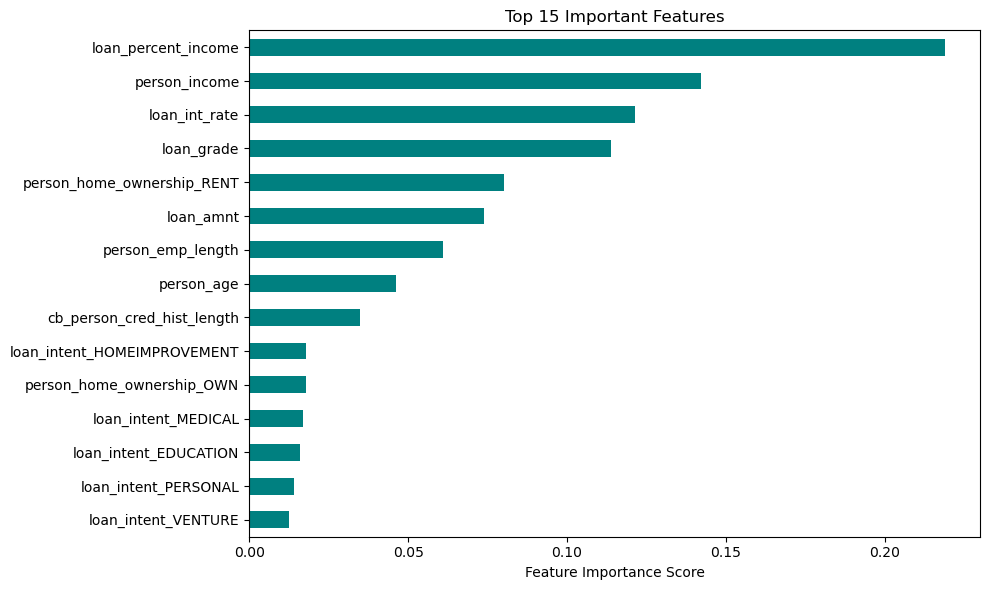

In [47]:
def feature_imp(model):
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    feature_importances.nlargest(15).plot(kind='barh', figsize=(10, 6), color='teal')
    plt.title("Top 15 Important Features")
    plt.xlabel("Feature Importance Score")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
feature_imp(modelr)

# Feature Engineering


In [48]:
df['dti'] = df['loan_amnt'] / df['person_income']

monthly_rate = df['loan_int_rate'] / 12 / 100
loan_term_months = 36

df['emi'] = (df['loan_amnt'] * monthly_rate) / (1 - (1 + monthly_rate) ** (-loan_term_months))

df['balance_income'] = df['person_income'] - df['emi']


In [49]:

X = df.drop('loan_status', axis=1)
y = df['loan_status']

from sklearn.preprocessing import StandardScaler

scale_cols = ['dti', 'emi', 'balance_income']
scaler = StandardScaler()
X[scale_cols] = scaler.fit_transform(X[scale_cols])


In [50]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [51]:
eval(X_test,model1)

📌 Confusion Matrix:
 [[4448   39]
 [ 363  878]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      4487
           1       0.96      0.71      0.81      1241

    accuracy                           0.93      5728
   macro avg       0.94      0.85      0.89      5728
weighted avg       0.93      0.93      0.93      5728

🏅 ROC AUC Score: 0.9320


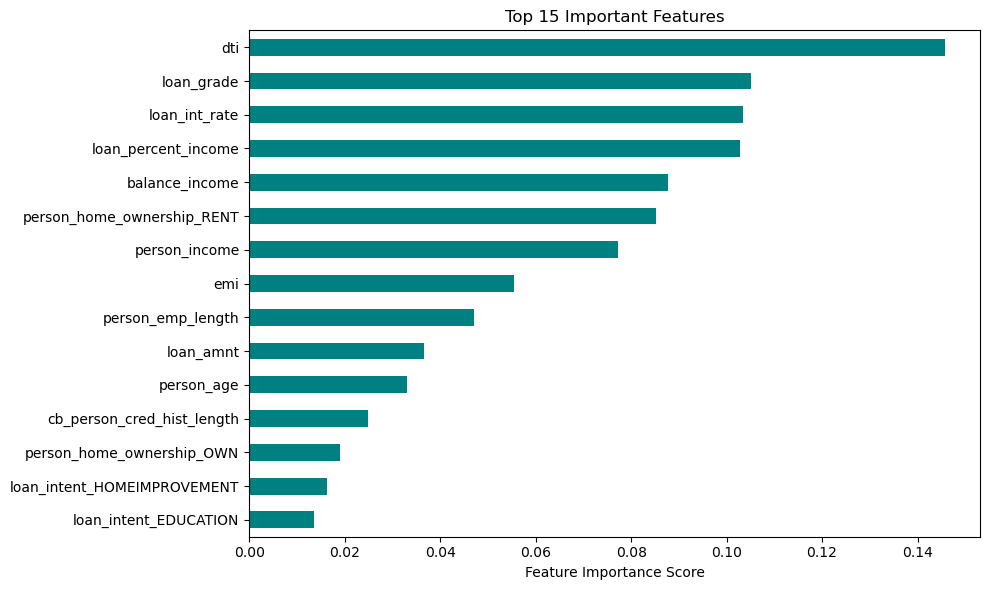

In [52]:
feature_imp(model1)

In [54]:
import joblib
joblib.dump(modelr, 'loan_approval_RF_model.pkl')


['loan_approval_RF_model.pkl']

In [55]:
X.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'dti', 'emi',
       'balance_income'],
      dtype='object')